# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified

images:
Cat images:


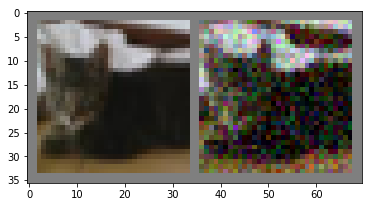

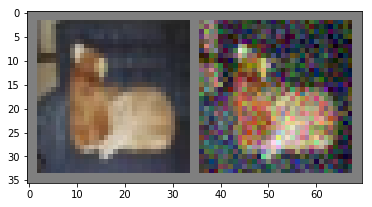

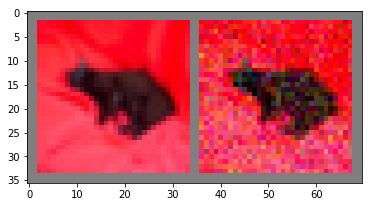

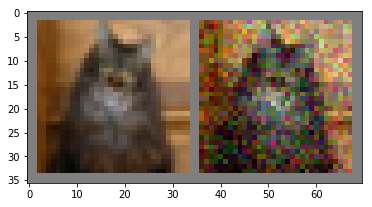

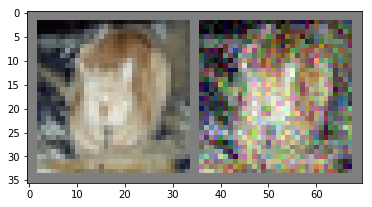

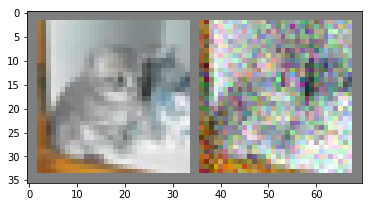

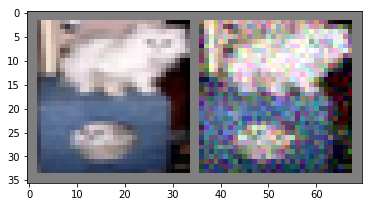

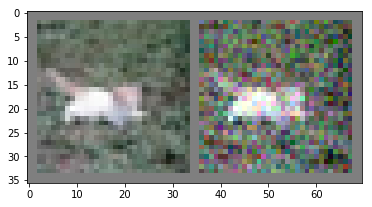

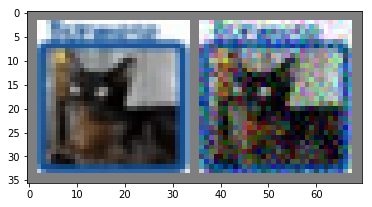

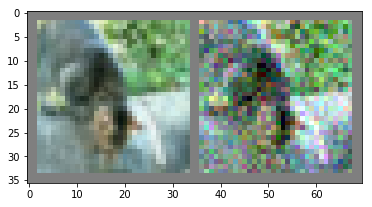


Dog images:


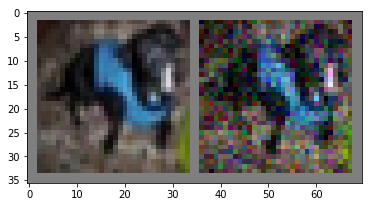

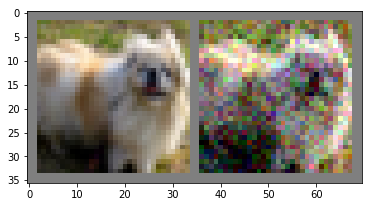

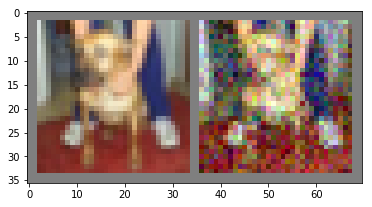

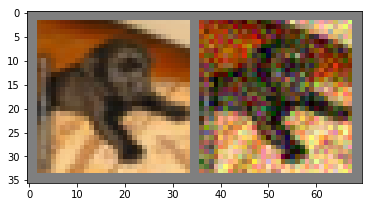

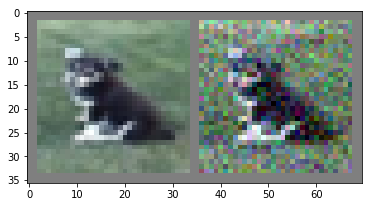

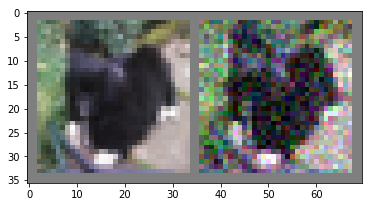

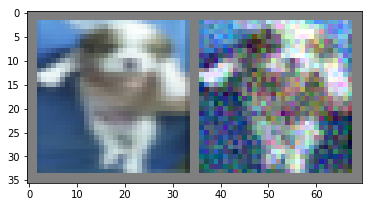

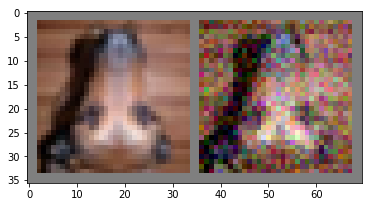

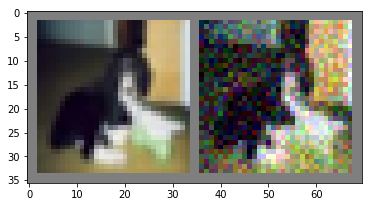

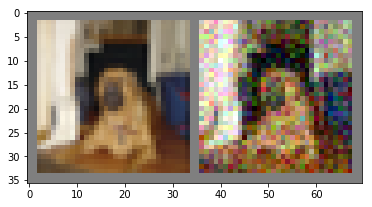

In [28]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#1ab)
scale = 0.2
#add nosie
def nosiy(img):
    img = img + scale * torch.randn(3,32,32)
    img = np.clip(img,-1,1)
    return img

#trasnform: preprocess the dataset
torch.manual_seed(1722846)
transform = transforms.Compose(     #compose several processes to one
    [transforms.ToTensor(),     #transform a [0,255] PIL(python image library).image to tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),    #normalize the value to [-1,1], first():mean, second():std  x = (x - mean(x))/stddev(x)
     transforms.Lambda(lambda img: nosiy(img))])

#CIFAR10: 60,000 imgs, 50,000 for training, 10,000 for test
#get datasets with noise
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# print(trainset[0][0]) #0 for img, 1 for label

#get original datasets
transform_original = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset_original = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_original)
testset_original = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_original)

#1c)
#get catdog subsets with noise
#get CatDog_traindata
index=0
CatDog_indices_trainset = []
for traindata in trainset:
    if(traindata[1]==3 or traindata[1]==5):
        CatDog_indices_trainset.append(index)
    index += 1
CatDog_traindata = torch.utils.data.Subset(trainset, CatDog_indices_trainset)
#get CatDog_testdata
index=0
CatDog_indices_testset = []
for testdata in testset:
    if(testdata[1]==3 or testdata[1]==5):
        CatDog_indices_testset.append(index)
    index += 1
CatDog_testdata = torch.utils.data.Subset(testset, CatDog_indices_testset)

#get catdog subset without noise
#get CatDog_traindata_original
index=0
CatDog_indices_trainset_original = []
for traindata_original in trainset_original:
    if(traindata_original[1]==3 or traindata_original[1]==5):
        CatDog_indices_trainset_original.append(index)
    index += 1
CatDog_traindata_original = torch.utils.data.Subset(trainset_original, CatDog_indices_trainset_original)
#get CatDog_testdata_original
index=0
CatDog_indices_testset_original = []
for testdata_original in testset_original:
    if(testdata_original[1]==3 or testdata_original[1]==5):
        CatDog_indices_testset_original.append(index)
    index += 1
CatDog_testdata_original = torch.utils.data.Subset(testset_original, CatDog_indices_testset_original)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
#1d)
#show imgs
cat_num = 0
print('')
print('images:')
print('Cat images:')
for i in range(10000):
    if(cat_num==10):
        break
    if(CatDog_traindata_original[i][1]==3):
        imshow(torchvision.utils.make_grid([CatDog_traindata_original[i][0],CatDog_traindata[i][0]]))
        cat_num += 1
dog_num = 0
print('')
print('Dog images:')
for i in range(10000):
    if(dog_num==10):
        break
    if(CatDog_traindata_original[i][1]==5):
        imshow(torchvision.utils.make_grid([CatDog_traindata_original[i][0],CatDog_traindata[i][0]]))
        dog_num += 1
       


### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [29]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix
#2a)
#get X and Y from pytorch dataset
def get_X_and_y(dataset):
    X = np.zeros(shape=(len(dataset),3,32,32))
    Y = np.zeros(shape=(len(dataset), ))
    for i in range(len(dataset)):
        X[i] = dataset[i][0].numpy()
        Y[i] = dataset[i][1]    #dataset[i][1] is an int
    return  X,Y

#get X and Y from CatDog dataset without noise
X_trainset_original,y_trainset_original = get_X_and_y(CatDog_traindata_original)
# print(Y_trainset_original.shape)
no_components = 150     #max 3072
#Expand 4D X_trainset matrix into 2D
X_trainset_original_reshape = X_trainset_original.reshape((X_trainset_original.shape[0],3*32*32))
#show PCA components ratio
pca_CIFAR10_original = PCA(n_components=no_components, svd_solver='full', whiten=True).fit(X_trainset_original_reshape)
components_ratio = (np.cumsum(pca_CIFAR10_original.explained_variance_ratio_))
print("PCA components ratio")
print(components_ratio)
least_compunent = 0
for i in range(components_ratio.shape[0]):
    if(components_ratio[i]>0.8):
        print("The first ",i," components has contributed over 80% variance")
        least_compunent = i
        break
for i in range(components_ratio.shape[0]):
    if(components_ratio[i]>0.9):
        print("The first ",i," components has contributed over 90% variance")
        least_compunent = i
        break
k_values = [1,3,20,31,50,70,150]
#A: Because the first 31 components has contributed over 80% variance. So we choose 3 numbers smaller than 31 and 3
#   numbers larger than 31 and 31 to observe the different prediction performance. So finallt we choose 
#   [1,3,20,31,50,70,150] these 7 numbers.


PCA components ratio
[0.25522314 0.36369458 0.43871597 0.50074144 0.53299854 0.56077785
 0.58707382 0.61081931 0.63033609 0.64962397 0.66448901 0.67709188
 0.68924474 0.69992675 0.70858126 0.7170924  0.72479548 0.73217716
 0.73936567 0.74612983 0.75256235 0.75858578 0.76406406 0.76919149
 0.77427393 0.77900803 0.78342796 0.78780749 0.79195631 0.79601123
 0.79992271 0.80380245 0.80744026 0.8108934  0.81414076 0.81729837
 0.82029746 0.82326256 0.8260664  0.828807   0.83147516 0.83409949
 0.83662967 0.83901397 0.84130093 0.84354537 0.84572902 0.84785729
 0.84991904 0.85189191 0.8538316  0.85574825 0.85757038 0.85934345
 0.86101798 0.86266011 0.8642823  0.86586691 0.8674154  0.86893989
 0.87042462 0.87190178 0.87331736 0.87472367 0.8761107  0.87746333
 0.87880047 0.88009971 0.88138243 0.88263524 0.88382653 0.88499885
 0.88616483 0.88730845 0.88842893 0.88953414 0.89062351 0.89169415
 0.8927469  0.89379054 0.89479395 0.89578114 0.89674818 0.89770831
 0.89865901 0.89957519 0.90047306 0.90136

Correct ratio for original features is:  0.5935
Correct ratio for model with K value =  1  is:  0.5185
Correct ratio for model with K value =  3  is:  0.566
Correct ratio for model with K value =  20  is:  0.5975
Correct ratio for model with K value =  31  is:  0.609
Correct ratio for model with K value =  50  is:  0.603
Correct ratio for model with K value =  70  is:  0.6005
Correct ratio for model with K value =  150  is:  0.5795


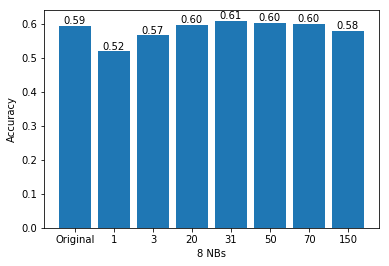

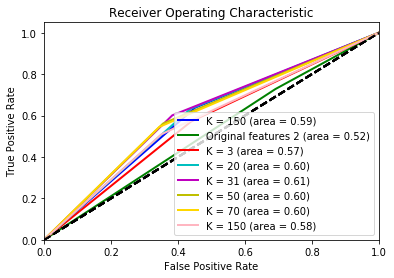

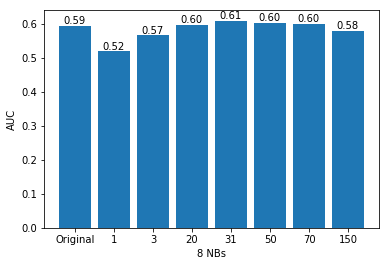

In [30]:
#2b2c)
#A: Because our features in the datasets are continuous and it is very hard to separate them into discrete classes. So
#   we choose Gaussian NB.
#get X and y for testset
X_testset_original, y_testset_original = get_X_and_y(CatDog_testdata_original)
X_testset_original_reshape = X_testset_original.reshape((X_testset_original.shape[0],3*32*32))
#Gaussian NB
model = GaussianNB()    #automatically set the prior
model.fit(X_trainset_original_reshape, y_trainset_original);
Y_testset_original_predict = []
y_testset_original_predict = model.predict(X_testset_original_reshape)
Y_testset_original_predict.append(y_testset_original_predict)
# print(y_testset_original_predict)
correct_ratio = []
correct_ratio.append(accuracy_score(y_testset_original,y_testset_original_predict))
print("Correct ratio for original features is: ", correct_ratio[0])

#get new features after PCA for dataset
X_train_CIFAR10_original_intmde = []
X_test_CIFAR10_original_intmde = []
for i in range(len(k_values)):
    k_values[i] = int(k_values[i])
    pca = PCA(n_components=int(k_values[i]), svd_solver='auto', whiten=True)
    X_train_CIFAR10_original_intmde.append(pca.fit_transform(X_trainset_original_reshape))
    X_test_CIFAR10_original_intmde.append(pca.transform(X_testset_original_reshape))#testset should use the same PCA on trainset

for i in range(7):
    model = GaussianNB()    #automatically set the prior
    model.fit(X_train_CIFAR10_original_intmde[i], y_trainset_original);
    y_testset_original_predict = model.predict(X_test_CIFAR10_original_intmde[i])
    Y_testset_original_predict.append(y_testset_original_predict)
    correct_ratio.append(accuracy_score(y_testset_original,y_testset_original_predict))
    print("Correct ratio for model with K value = ", k_values[i] ," is: ", correct_ratio[i+1])

bar_x = ['Original']
#label function for a bar graph
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.3, 1.01*height, '%0.2f' % float(height))
for value in k_values:
    bar_x.append(value)
accuracy_bar = plt.bar(range(len(bar_x)),correct_ratio, tick_label = bar_x)
plt.xlabel('8 NBs')
plt.ylabel('Accuracy')
autolabel(accuracy_bar)
plt.show()

#2d)roc
line_colors = ['b','g','r','c','m','y','gold','lightpink']
color_index = 0
aucs = []
for y_predict in Y_testset_original_predict:
    fpr,tpr,thresholds = roc_curve(y_testset_original,y_predict,pos_label=5)
    roc_auc = auc(fpr,tpr)
    aucs.append(roc_auc)
    if(color_index==1):
        plt.plot(fpr, tpr, color=line_colors[color_index],
                 lw=2, label='Original features %s (area = %0.2f)' % (color_index+1,roc_auc))
    else:
        plt.plot(fpr, tpr, color=line_colors[color_index],
                 lw=2, label='K = %s (area = %0.2f)' % (k_values[color_index-1], roc_auc))
    color_index+=1
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plt.show()

#2e)
aucs_bar = plt.bar(range(len(bar_x)),aucs, tick_label = bar_x)
plt.xlabel('8 NBs')
plt.ylabel('AUC')
autolabel(aucs_bar)
plt.show()

#2f)
#First:The first component contributes 25% variance. And the first 31 components from PCA has contributed over 80% 
#      variance. But if we want to save 90% information we need to use 86 components.
#Second:We can see use the original features the classifier can achieve 0.59 accuracy. However, even using only one
#      omponent can also reach 0.52 accuracy. And using the first 20 components to train the model, we can achieve 
#      a better performance than even using the original features.
#Third:The value of AUC is equal to the Accuracy. And if we use 31 components to train the model which meams if we save
#      about 80% information we can make a better prediction by using Naive Bayes classifiers. And if we use more 
#      components, the performance will decrease.


### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

Correct ratio for original features is:  0.5915
Correct ratio for model with K value =  1  is:  0.5195
Correct ratio for model with K value =  3  is:  0.5695
Correct ratio for model with K value =  20  is:  0.5965
Correct ratio for model with K value =  31  is:  0.6135
Correct ratio for model with K value =  50  is:  0.6045
Correct ratio for model with K value =  70  is:  0.6
Correct ratio for model with K value =  150  is:  0.577


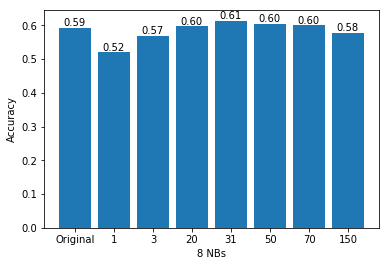

In [31]:
#3a)
#get X and Y from CatDog dataset with noise
X_trainset,y_trainset = get_X_and_y(CatDog_traindata)
# print(Y_trainset_original.shape)
no_components = 500     #max 3072
#Expand 4D X_trainset matrix into 2D
X_trainset_reshape = X_trainset.reshape((X_trainset.shape[0],3*32*32))
#show PCA components ratio
pca_CIFAR10 = PCA(n_components=no_components, svd_solver='randomized', whiten=True).fit(X_trainset_reshape)
components_ratio = (np.cumsum(pca_CIFAR10.explained_variance_ratio_))
#seperate the catdog_testset
X_testset, y_testset = get_X_and_y(CatDog_testdata)
X_testset_reshape = X_testset.reshape((X_testset.shape[0],3*32*32))
#Gaussian NB
model = GaussianNB()    #automatically set the prior
model.fit(X_trainset_reshape, y_trainset);
#get X and y for testset
Y_testset_predict = []
y_testset_predict_raw = model.predict(X_testset_reshape)
Y_testset_predict.append(y_testset_predict_raw)
# print(y_testset_original_predict)
correct_ratio = []
correct_ratio.append(accuracy_score(y_testset,y_testset_predict_raw))
print("Correct ratio for original features is: ", correct_ratio[0])
#get new features after PCA for dataset
X_test_CIFAR10_intmde = []
X_train_CIFAR10_intmde = []
for i in range(len(k_values)):
    k_values[i] = int(k_values[i])
    pca = PCA(n_components=int(k_values[i]), svd_solver='randomized', whiten=True)
    X_train_CIFAR10_intmde.append(pca.fit_transform(X_trainset_reshape))
    X_test_CIFAR10_intmde.append(pca.transform(X_testset_reshape)) 

for i in range(7):
    model = GaussianNB()    #automatically set the prior
    model.fit(X_train_CIFAR10_intmde[i], y_trainset);
    y_testset_predict_k = model.predict(X_test_CIFAR10_intmde[i])
    Y_testset_predict.append(y_testset_predict_k)
    correct_ratio.append(accuracy_score(y_testset,y_testset_predict_k))
    print("Correct ratio for model with K value = ", k_values[i] ," is: ", correct_ratio[i+1])
bar_x = ['Original']
for value in k_values:
    bar_x.append(value)
accuracy_bar = plt.bar(range(len(bar_x)),correct_ratio, tick_label = bar_x)
plt.xlabel('8 NBs')
plt.ylabel('Accuracy')
autolabel(accuracy_bar)
plt.show()

In [32]:
#3b)
#get X and Y from whole dataset without noise
X_trainset_original,y_trainset_original = get_X_and_y(trainset_original)
X_testset_original, y_testset_original = get_X_and_y(testset_original)
X_trainset_original_reshape = X_trainset_original.reshape((X_trainset_original.shape[0],3*32*32))
X_testset_original_reshape = X_testset_original.reshape((X_testset_original.shape[0],3*32*32))
pca_CIFAR10 = PCA(n_components=150, svd_solver='randomized', whiten=True).fit(X_trainset_original_reshape)
components_ratio = (np.cumsum(pca_CIFAR10.explained_variance_ratio_))
# print(components_ratio)
least_component = 0
for i in range(components_ratio.shape[0]):
    if(components_ratio[i]>0.8):
        print("The first ",i," components has contributed over 80% variance")
        least_component = i
        break
k_values = [10,32,100]
#get new features after PCA for dataset
X_trainset_original_CIFAR10_intmde = []
X_test_original_CIFAR10_intmde = []
for i in range(len(k_values)):
    k_values[i] = int(k_values[i])
    pca = PCA(n_components=int(k_values[i]), svd_solver='randomized', whiten=True)
    X_trainset_original_CIFAR10_intmde.append(pca.fit_transform(X_trainset_original_reshape))
    X_test_original_CIFAR10_intmde.append(pca.transform(X_testset_original_reshape))


#A: Because the first 32 components has contributed over 80% variance. So we choose one number smaller than 32 and one
#number larger than 32 and 32 to observe the different prediction performance. So finally we choose [10,32,100] these
#three numbers.


The first  32  components has contributed over 80% variance


In [33]:
#3c)
import time
#NB
from sklearn import metrics
starttime = time.time()
model = GaussianNB()
model.fit(X_trainset_original_reshape, y_trainset_original)
endtime = time.time()
correct_original_ratio = []
time_spending = []
time_spending.append((endtime-starttime))
time_spending_test = []
# make predictions
starttime = time.time()
y_testset_original_predict = model.predict(X_testset_original_reshape)
endtime = time.time()
time_spending_test.append((endtime-starttime))
correct_original_ratio.append(accuracy_score(y_testset_original_predict,y_testset_original))
print("Confusion metrics for NB classifiers: ")
print("original")
print(metrics.confusion_matrix(y_testset_original, y_testset_original_predict))

for i in range(3):
    starttime = time.time()
    model = GaussianNB()
    model.fit(X_trainset_original_CIFAR10_intmde[i], y_trainset_original)
    endtime = time.time()
    time_spending.append((endtime-starttime))
    starttime = time.time()
    y_testset_original_predict_k = model.predict(X_test_original_CIFAR10_intmde[i])
    endtime = time.time()
    time_spending_test.append((endtime-starttime))
    correct_original_ratio.append(accuracy_score(y_testset_original_predict_k,y_testset_original))
    print("k = ",k_values[i])
    print(metrics.confusion_matrix(y_testset_original, y_testset_original_predict_k))
print(correct_original_ratio)
# print(time_spending)
# print(time_spending_test)
    

Confusion metrics for NB classifiers: 
original
[[494  20  39  10  84  34  50   9 200  60]
 [141 166  24  31  66  72 192  19 121 168]
 [225  24  83  15 292  48 209  21  54  29]
 [163  36  54  76 151 129 262  26  34  69]
 [ 86   8  57  26 417  38 265  22  50  31]
 [156  17  55  51 167 264 159  36  57  38]
 [106   2  60  18 228  46 467  15  19  39]
 [134  24  36  41 228  94 102 131  72 138]
 [168  41  18  17  56  83  39   8 471  99]
 [144  67  17  20  48  32 101  23 141 407]]
k =  10
[[459  36  67  23  58  10  54  36 183  74]
 [ 46 297  38  47  55  34 108  53 111 211]
 [117  44 161  68 250  41 203  50  36  30]
 [ 57  54 102 155 143 158 148 101  17  65]
 [ 36  40  89  47 388  43 244  57  25  31]
 [ 41  39  83 127 142 290 134  82  29  33]
 [ 13  47  60  55 190  52 490  44   6  43]
 [ 35  59  69  75 203  67 111 213  45 123]
 [174  78  27  28  43  45  22  18 453 112]
 [ 48 130  37  34  54  23  64  49 146 415]]
k =  32
[[429  51  50  37  95  21  57  43 149  68]
 [ 56 384  25  60  39  36  69  

In [34]:
#LR
from sklearn.linear_model import LogisticRegression
starttime = time.time()
model = LogisticRegression(solver='lbfgs') 
model.fit(X_trainset_original_reshape, y_trainset_original)
endtime = time.time()
correct_original_ratio_LR = []
time_spending_LR = []
time_spending_LR.append((endtime-starttime))
time_spending_test_LR = []
starttime = time.time()
y_testset_original_predict = model.predict(X_testset_original_reshape)
endtime = time.time()
time_spending_test_LR.append((endtime-starttime))
correct_original_ratio_LR.append(accuracy_score(y_testset_original_predict,y_testset_original))
print("Confusion metrics for LR classifiers: ")
print("original")
print(metrics.confusion_matrix(y_testset_original, y_testset_original_predict))

for i in range(3):
    starttime = time.time()
    model = LogisticRegression(solver='lbfgs') 
    model.fit(X_trainset_original_CIFAR10_intmde[i], y_trainset_original)
    endtime = time.time()
    time_spending_LR.append((endtime-starttime))
    starttime = time.time()
    y_testset_original_predict_k = model.predict(X_test_original_CIFAR10_intmde[i])
    endtime = time.time()
    time_spending_test_LR.append((endtime-starttime))
    correct_original_ratio_LR.append(accuracy_score(y_testset_original_predict_k,y_testset_original))
    print("k = ",k_values[i])
    print(metrics.confusion_matrix(y_testset_original, y_testset_original_predict_k))
# print(correct_original_ratio_LR)
# print(time_spending_LR)
# print(time_spending_test_LR)

Confusion metrics for LR classifiers: 
original
[[496  46  48  32  24  30  24  50 177  73]
 [ 68 454  27  46  26  40  46  56  70 167]
 [ 99  44 275  88 107  89 142  83  44  29]
 [ 50  51  98 221  60 205 147  50  50  68]
 [ 58  30 136  70 278  96 167 107  31  27]
 [ 36  46  96 165  85 331  86  75  42  38]
 [ 26  44  80 123  91  90 455  41  23  27]
 [ 43  46  80  65  88  81  44 433  39  81]
 [141  74  21  31  18  37  19  24 532 103]
 [ 75 174  25  33  28  25  45  68  93 434]]
k =  10
[[478  62  33  16  11  27  30  46 221  76]
 [ 62 344  16  26  40  33  99  31 132 217]
 [149  71 165  26 106 123 190  78  49  43]
 [ 70  86  96  58  88 259 143 101  29  70]
 [ 62  61 112  49 184 117 257  82  36  40]
 [ 52  47  89  35  82 382 117 103  56  37]
 [ 32  81  61  32  64 143 434  84  10  59]
 [ 59  68  91  33 125 106  97 223  48 150]
 [157 102  20  25   8  61   6   7 478 136]
 [ 51 153  36   9  26  22  53  41 152 457]]
k =  32
[[471  61  38  27  13  29  27  55 206  73]
 [ 80 426  25  42  17  42  77  

In [46]:
#CNN
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

myconv1 = nn.Conv2d(in_channels=3,  # number of input channels
                 out_channels=7, # number of output channels
                 kernel_size=5)  # size of the kernel, 
myconv2 = nn.Conv2d(in_channels=3,
                  out_channels=7,
                  kernel_size=5,
                  padding=2)
mypool = nn.MaxPool2d(kernel_size=2, stride=2)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #3: #input channels; 6: #output channels; 5: kernel size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

#Hyperparameters for training
batch_size=64
learning_rate=0.001
max_epochs=10

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
train_loader_original = torch.utils.data.DataLoader(trainset_original, batch_size=batch_size, shuffle=True)
#start training
starttime = time.time()
for epoch in range(max_epochs):
    loss_total = 0.0
    loss_count = 0
    for data in (train_loader_original):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        loss_total += loss
        loss_count += 1
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss_total/loss_count)))
endtime = time.time()
print('Finished Training')
time_spending_CNN = (endtime-starttime)
# print(time_spending_CNN)
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)

Epoch:1, Loss:2.3002
Epoch:2, Loss:2.1652
Epoch:3, Loss:1.8879
Epoch:4, Loss:1.7300
Epoch:5, Loss:1.6206
Epoch:6, Loss:1.5317
Epoch:7, Loss:1.4609
Epoch:8, Loss:1.4093
Epoch:9, Loss:1.3601
Epoch:10, Loss:1.3191
Finished Training


In [47]:
correct_predict = 0
total_test = 0
y_labels_predict = []
y_labels_true = []
starttime = time.time()
test_loader_original = torch.utils.data.DataLoader(testset_original, batch_size=1, shuffle=True)
with torch.no_grad(): #don't need grad computing when doing prediction
    for data in test_loader_original:
        img, label = data
        label_predict = torch.max(net(img).data, 1)
        y_labels_predict.append((label_predict[1].numpy())[0])
        y_labels_true.append(label)
        if(label==label_predict[1]):
            correct_predict += 1
        total_test += 1
endtime = time.time()
correct_original_ratio_CNN = correct_predict/total_test
time_spending_test_CNN = (endtime-starttime)
print("Confusion metrics for CNN classifiers: ")
print(metrics.confusion_matrix(y_labels_true, (y_labels_predict)))
# print(correct_original_ratio_CNN)
# print(time_spending_test_CNN)

Confusion metrics for CNN classifiers: 
[[607  46  77   8  42  12  23  25  76  84]
 [ 33 714  10   2  14   4  15  13  26 169]
 [ 74  20 369  40 224  76  79  74  16  28]
 [ 22  23 102 245 116 253 114  67   8  50]
 [ 42  16 109  35 509  50 105 114   8  12]
 [ 17   6 113  96  88 486  47 116   9  22]
 [  7  17  54  45 169  29 611  30   3  35]
 [ 19   8  28  26 108 101  26 628   3  53]
 [186  91  24  13  11  10  19   9 529 108]
 [ 41 149  11   9  11   9  29  42  32 667]]


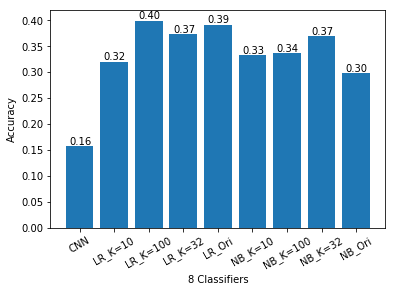

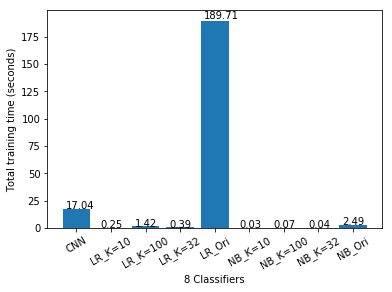

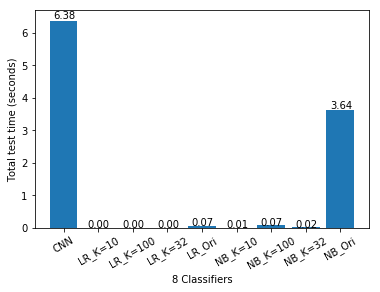

In [38]:
#3d)
#show bar graphs
accuracy_all = []
accuracy_all = accuracy_all + correct_original_ratio + correct_original_ratio_LR
accuracy_all.append(correct_original_ratio_CNN)
time_all = []
time_all = time_all + time_spending + time_spending_LR
time_all.append(time_spending_CNN)
time_test_all = []
time_test_all = time_test_all + time_spending_test + time_spending_test_LR
time_test_all.append(time_spending_test_CNN)
NB_name_k = []
LR_name_k = []
for i in range(3):
    NB_name_k.append('NB_K='+str(k_values[i]))
    LR_name_k.append('LR_K='+str(k_values[i]))
bar_x = ['NB_Ori']
bar_x = bar_x + NB_name_k
bar_x.append('LR_Ori')
bar_x = bar_x + LR_name_k
bar_x.append('CNN')
#plot accuracy bar graph
accuracy_bar = plt.bar(bar_x,accuracy_all)
plt.xticks(bar_x, bar_x, rotation=30)
plt.xlabel('8 Classifiers')
plt.ylabel('Accuracy')
autolabel(accuracy_bar)
plt.show()
#plot total training time bar graph
time_bar = plt.bar(bar_x,time_all)
plt.xticks(bar_x, bar_x, rotation=30)
plt.xlabel('8 Classifiers')
plt.ylabel('Total training time (seconds)')
autolabel(time_bar)
plt.show()
#plot total test time bar graph
time_test_bar = plt.bar(bar_x,time_test_all)
plt.xticks(bar_x, bar_x, rotation=30)
plt.xlabel('8 Classifiers')
plt.ylabel('Total test time (seconds)')
autolabel(time_test_bar)
plt.show()


In [ ]:
#3e)
#A: Confusion metrics are above.
#3f)
#First: If we choose the original features to train the model. It will take the longest time because there are too many
#features. Especially when we use the Logistic Regression. However if we use the PCA to reduce the dimension of inputs
#we can get a far more better time performance.
#Second:The Convoluational Neural Network will take the longest time to make the prediction. Whereas the Navie Bayse 
#using the original features will also take a long time to make the prediction. However the Logistic Regression using
#dimension-reduced features will make the prediction at a very short time.
#Second:The Convoluational Neural Network can get the best prediction performance among the three kinds of classifiers.
#Meanwhile, the Logistic Regress performed worse than CNN but better than Navie Bayse. And if we use the PCA on Navie
#Bayse and Logistic Regression, if we use the appropriate we can get both a better prediction performance and a better
#time performance.

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [39]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch.nn as nn
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = 2 * x - 1 
        return x

myAE=Autoencoder()

#Hyperparameters for training
batch_size=64
learning_rate=0.001
max_epochs=10

#Set the random seed for reproducibility
#Choose mean square error loss
criterion = nn.MSELoss()
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)
train_loader_original = torch.utils.data.DataLoader(trainset_original, batch_size=batch_size, shuffle=True)
#Start training
for epoch in range(max_epochs):
    loss_total = 0.0
    loss_count = 0
    for data in train_loader_original:
        img, label = data
        optimizer.zero_grad()
        img_noise = np.clip(img + 0.2 * torch.randn(3,32,32),-1,1)
        recon = myAE(img_noise)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()
        loss_total += loss
        loss_count += 1
    print('Epoch:{}, Reconstruction error:{:.4f}'.format(epoch+1, float(loss_total/loss_count)))
print('Finished Training')

Epoch:1, Reconstruction error:0.0632
Epoch:2, Reconstruction error:0.0291
Epoch:3, Reconstruction error:0.0237
Epoch:4, Reconstruction error:0.0213
Epoch:5, Reconstruction error:0.0199
Finished Training


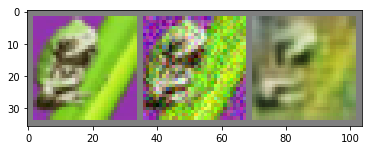

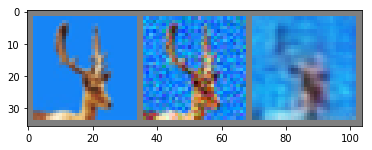

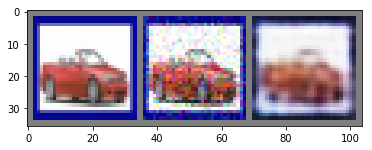

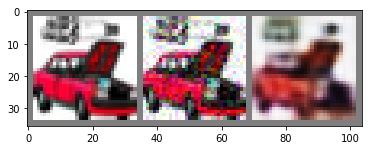

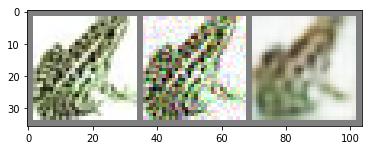

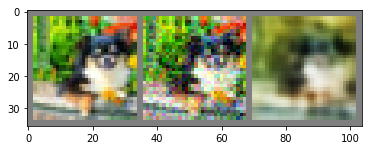

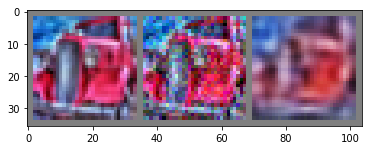

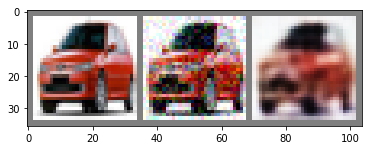

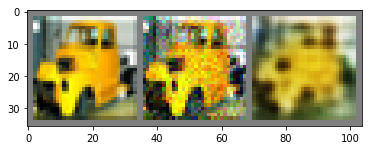

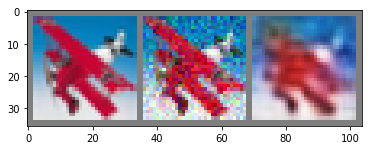

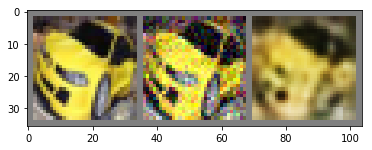

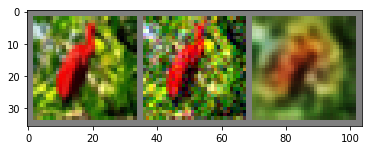

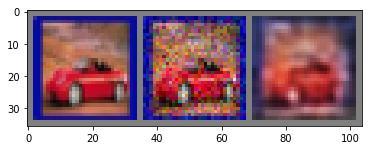

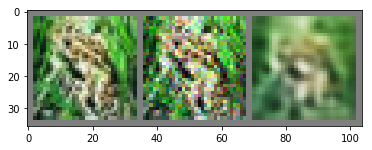

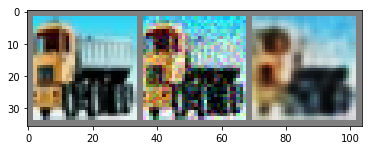

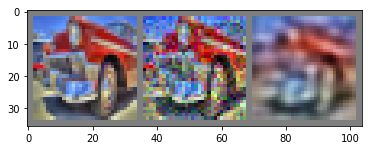

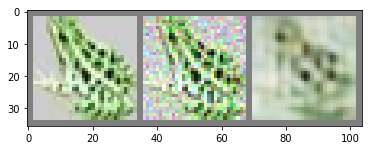

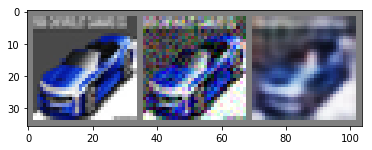

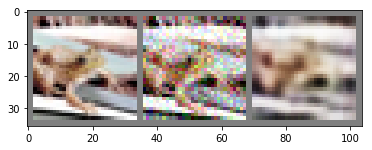

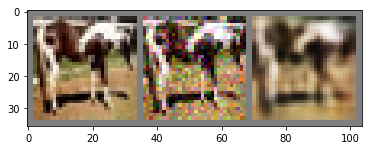

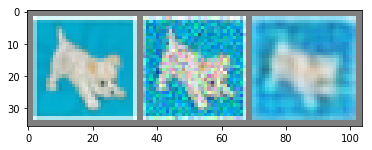

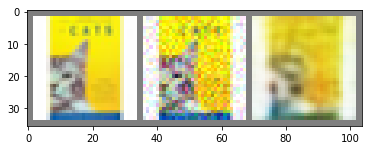

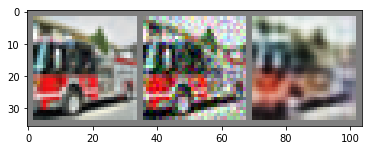

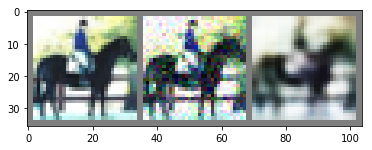

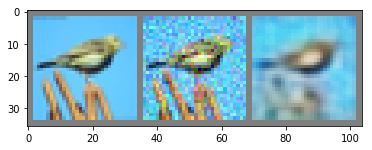

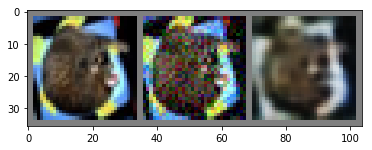

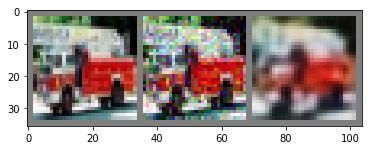

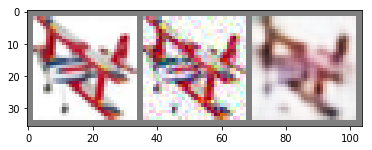

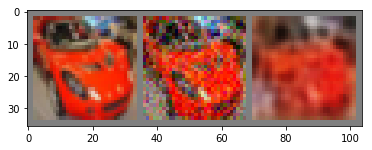

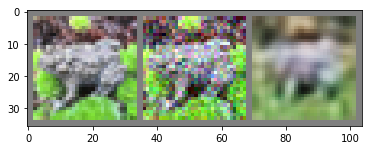

In [40]:
#4c
testset_losses = {}
worst_pics = {}
testset_index = 0
outputs = []
with torch.no_grad(): 
    for data in test_loader_original:
        img, label = data
        img_noise = np.clip(img + 0.2 * torch.randn(3, 32, 32), -1, 1)
        recon = myAE(img_noise)
        loss = criterion(recon, img)
        testset_losses[testset_index] = float(loss)
        worst_pics[testset_index] = recon
        testset_index += 1
        outputs.append((img, img_noise ,recon))
worst_pics_index = sorted(testset_losses, key=testset_losses.__getitem__, reverse=True)[:30]
# plt.imshow(np.transpose(item.numpy(), (1, 2, 0)))
for i in range(len(worst_pics_index)):
    img = outputs[worst_pics_index[i]][0].detach()
    img_noise = outputs[worst_pics_index[i]][1].detach()
    recon = outputs[worst_pics_index[i]][2].detach()
    imshow(torchvision.utils.make_grid([img[0],img_noise[0],recon[0]])) 


In [45]:
#4d)
max_epochs=5
#train model in different batch size
learning_rate=0.001
loss_batch_size = []
for batch_size in [32,64,128]:
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
    train_loader_original = torch.utils.data.DataLoader(trainset_original, batch_size=batch_size, shuffle=True)
    #Start training
    print('batch size = ',batch_size)
    for epoch in range(max_epochs):
        loss_total = 0
        loss_count = 0
        for data in train_loader_original:
            img, label = data
            optimizer.zero_grad()
            img_noise = np.clip(img + 0.2 * torch.randn(3,32,32),-1,1)
            recon = myAE(img_noise)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            loss_total += loss
            loss_count += 1
    loss_batch_size.append(loss_total/loss_count)
plt.plot([32,64,128], loss_batch_size,linestyle='-',color='b')
plt.show()
#train model in different learning rate
batch_size=64
loss_learning_rate = []
for learning_rate in [0.001,0.005,0.01]:
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
    train_loader_original = torch.utils.data.DataLoader(trainset_original, batch_size=batch_size, shuffle=True)
    #Start training
    print('learning rate = ',learning_rate)
    for epoch in range(max_epochs):
        loss_total = 0
        loss_count = 0
        for data in train_loader_original:
            img, label = data
            optimizer.zero_grad()
            img_noise = np.clip(img + 0.2 * torch.randn(3,32,32),-1,1)
            recon = myAE(img_noise)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            loss_total += loss
            loss_count += 1
    loss_learning_rate.append(loss_total/loss_count)
plt.plot([0.001,0.005,0.01], loss_batch_size,linestyle='-',color='g')
plt.show()
    

learning rate =  0.001
learning rate =  0.005


KeyboardInterrupt: 

In [ ]:
#4e)
#First:The Denoising Autoencoder can denoise the noisy pictures and reconstruct them well. However, if a large area of 
#the image is in the same color, the result is not so good and has a large reconstruction error. In the worst 30 images
#from the test result, if a image with a large red blue or green area is most likely to get a large reconstruction error.
#Second:The hyperparameters can influence the performance of a Convoluational Neural Network a lot. If we don't change 
#other hyperparameters but only increase the batch size, the loss seems to decrease. And if we only increase the 
#learning rate, the loss will increase too. 

